<a href="https://colab.research.google.com/github/georgesamvel01/Amazon-Prime-video-Data-Anaytics/blob/main/Restarunt_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#TASK1
import pandas as pd
from collections import Counter


file_path = "Dataset .csv"
df = pd.read_csv("Dataset .csv")


cuisine_series = df['Cuisines'].dropna()


all_cuisines = []

for item in cuisine_series:

    cuisines = [c.strip() for c in item.split(',')]
    all_cuisines.extend(cuisines)

cuisine_counts = Counter(all_cuisines)


top_cuisines = cuisine_counts.most_common(3)


total_restaurants = len(df)

print(" Top 3 Most Common Cuisines:\n")
for cuisine, _ in top_cuisines:
    count = df['Cuisines'].dropna().apply(lambda x: cuisine in x).sum()


    percentage = (count / total_restaurants) * 100

    print(f" {cuisine}: {count} restaurants serve this — {round(percentage, 2)}% of all restaurants\n")


 Top 3 Most Common Cuisines:

 North Indian: 3960 restaurants serve this — 41.46% of all restaurants

 Chinese: 2733 restaurants serve this — 28.61% of all restaurants

 Fast Food: 1987 restaurants serve this — 20.8% of all restaurants



In [ ]:
#TASK 2
import pandas as pd

file_path = "Dataset .csv"
try:
    df = pd.read_csv("Dataset .csv")
    print(" Dataset loaded successfully!\n")
except Exception as e:
    print(" Error loading dataset:", e)
    exit()


print(" Basic Info About Dataset:")
print(f"Total entries: {len(df)}")
print("Available columns:", list(df.columns), "\n")


print(" Checking for missing values in 'City' and 'Aggregate rating':")
missing_city = df['City'].isnull().sum()
missing_rating = df['Aggregate rating'].isnull().sum()
print(f"Missing cities: {missing_city}")
print(f"Missing ratings: {missing_rating}\n")

df_clean = df.dropna(subset=['City', 'Aggregate rating'])


city_counts = df_clean['City'].value_counts()
city_with_most_restaurants = city_counts.idxmax()
most_restaurants_count = city_counts.max()

print(" City with the Most Restaurants:")
print(f"City: {city_with_most_restaurants}")
print(f"Number of Restaurants: {most_restaurants_count}\n")


avg_rating_per_city = (
    df_clean.groupby('City')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
)


avg_rating_per_city_rounded = avg_rating_per_city.round(2)

print(" Top 10 Cities by Average Restaurant Rating:")
print(avg_rating_per_city_rounded.head(10), "\n")


city_with_highest_avg_rating = avg_rating_per_city.idxmax()
highest_avg_rating = avg_rating_per_city.max()

print(" City with the Highest Average Restaurant Rating:")
print(f"City: {city_with_highest_avg_rating}")
print(f"Average Rating: {round(highest_avg_rating, 2)}\n")


print(" Bottom 5 Cities by Average Rating:")
print(avg_rating_per_city_rounded.tail(5), "\n")

output_data = pd.DataFrame({
    'City': avg_rating_per_city.index,
    'Average Rating': avg_rating_per_city.values,
    'Total Restaurants': df_clean['City'].value_counts().loc[avg_rating_per_city.index].values
})
output_data.to_csv("City_Average_Ratings.csv", index=False)
print(" Results saved to 'City_Average_Ratings.csv'")


 Dataset loaded successfully!

 Basic Info About Dataset:
Total entries: 9551
Available columns: ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes'] 

 Checking for missing values in 'City' and 'Aggregate rating':
Missing cities: 0
Missing ratings: 0

 City with the Most Restaurants:
City: New Delhi
Number of Restaurants: 5473

 Top 10 Cities by Average Restaurant Rating:
City
Inner City          4.90
Quezon City         4.80
Makati City         4.65
Pasig City          4.63
Mandaluyong City    4.62
Beechworth          4.60
London              4.54
Taguig City         4.53
Secunderabad        4.50
Lincoln             4.50
Name: Aggregate rating, dtype: float64 

 City with the Highest Average Restauran

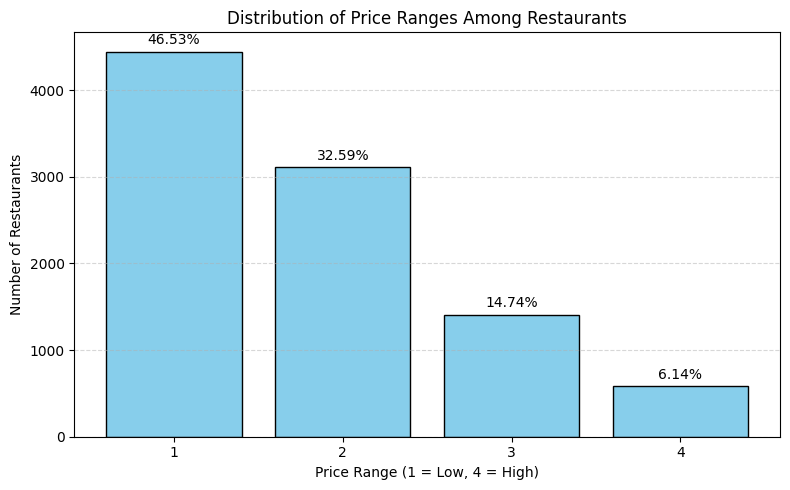

📊 Percentage of Restaurants in Each Price Range:
Price Range 1: 46.53%
Price Range 2: 32.59%
Price Range 3: 14.74%
Price Range 4: 6.14%


In [ ]:
#TASK 3


import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("Dataset .csv")

price_counts = df['Price range'].value_counts().sort_index()


total_restaurants = len(df)
price_percentages = (price_counts / total_restaurants * 100).round(2)

plt.figure(figsize=(8, 5))
bars = plt.bar(price_counts.index.astype(str), price_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range (1 = Low, 4 = High)')
plt.ylabel('Number of Restaurants')


for bar, percent in zip(bars, price_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, f'{percent}%', ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#
print("📊 Percentage of Restaurants in Each Price Range:")
for price, percent in price_percentages.items():
    print(f"Price Range {price}: {percent}%")


In [ ]:

#TASK 4


import pandas as pd


file_path = "Dataset .csv"
df = pd.read_csv("Dataset .csv")


df = df.dropna(subset=['Has Online delivery', 'Aggregate rating'])


total_restaurants = len(df)
online_delivery_yes = df[df['Has Online delivery'] == 'Yes']
online_delivery_no = df[df['Has Online delivery'] == 'No']

online_count = len(online_delivery_yes)
online_percent = round((online_count / total_restaurants) * 100, 2)

print(" Online Delivery Stats:")
print(f"Restaurants offering online delivery: {online_count} ({online_percent}%)")
print(f" Restaurants not offering online delivery: {len(online_delivery_no)} ({round((len(online_delivery_no)/total_restaurants)*100, 2)}%)\n")


avg_rating_with_delivery = round(online_delivery_yes['Aggregate rating'].mean(), 2)
avg_rating_without_delivery = round(online_delivery_no['Aggregate rating'].mean(), 2)

print(" Average Ratings Comparison:")
print(f" With Online Delivery: {avg_rating_with_delivery}")
print(f" Without Online Delivery: {avg_rating_without_delivery}")


📦 Online Delivery Stats:
Restaurants offering online delivery: 2451 (25.66%)
 Restaurants not offering online delivery: 7100 (74.34%)

 Average Ratings Comparison:
 With Online Delivery: 3.25
 Without Online Delivery: 2.47


 Online Delivery Statistics:

 Restaurants with Online Delivery: 2451 (25.66%)
 Restaurants without Online Delivery: 7100 (74.34%)

 Average Ratings:

 With Online Delivery: 3.25
 Without Online Delivery: 2.47


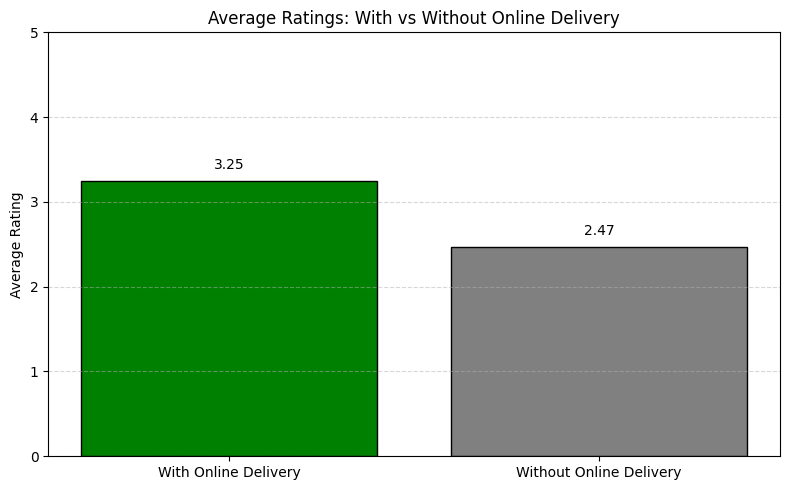


📁 Summary exported to: Online_Delivery_Analysis.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "Dataset .csv"
df = pd.read_csv("Dataset .csv")


df_clean = df.dropna(subset=['Has Online delivery', 'Aggregate rating'])


total_restaurants = len(df_clean)
online_delivery_yes = df_clean[df_clean['Has Online delivery'] == 'Yes']
online_delivery_no = df_clean[df_clean['Has Online delivery'] == 'No']

count_yes = len(online_delivery_yes)
count_no = len(online_delivery_no)

percent_yes = round((count_yes / total_restaurants) * 100, 2)
percent_no = round((count_no / total_restaurants) * 100, 2)


avg_rating_yes = round(online_delivery_yes['Aggregate rating'].mean(), 2)
avg_rating_no = round(online_delivery_no['Aggregate rating'].mean(), 2)


print(" Online Delivery Statistics:\n")
print(f" Restaurants with Online Delivery: {count_yes} ({percent_yes}%)")
print(f" Restaurants without Online Delivery: {count_no} ({percent_no}%)\n")

print(" Average Ratings:\n")
print(f" With Online Delivery: {avg_rating_yes}")
print(f" Without Online Delivery: {avg_rating_no}")


plt.figure(figsize=(8, 5))
bars = plt.bar(
    ['With Online Delivery', 'Without Online Delivery'],
    [avg_rating_yes, avg_rating_no],
    color=['green', 'gray'],
    edgecolor='black'
)
plt.title('Average Ratings: With vs Without Online Delivery')
plt.ylabel('Average Rating')
plt.ylim(0, 5)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


summary_df = pd.DataFrame({
    'Online Delivery': ['Yes', 'No'],
    'Count': [count_yes, count_no],
    'Percentage': [percent_yes, percent_no],
    'Average Rating': [avg_rating_yes, avg_rating_no]
})
summary_df.to_csv("Online_Delivery_Analysis.csv", index=False)

print("\n📁 Summary exported to: Online_Delivery_Analysis.csv")
